In [1]:
from skimage.io import imread, imshow, imsave

In [2]:
img = imread('tiger-gray-small.png')

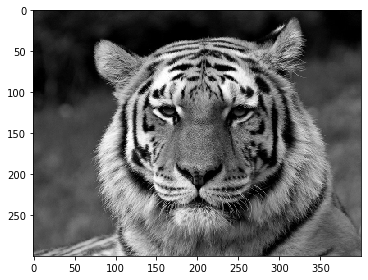

In [3]:
imshow(img);

In [4]:
img.shape

(300, 400)

In [5]:
sigma = 0.66

In [6]:
import numpy as np

In [7]:
import math

In [8]:
half = round(3 * sigma)
k = half * 2 + 1

kernel = []
for i in reversed(range(-half, half + 1)):
    for j in range(-half, half + 1):
        kernel.append((j, i))
kernel = (np.array(kernel).reshape(k, k, 2)).tolist()
for i in range(k):
    for j in range(k):
        kernel[i][j] = 1 / (2 * math.pi * sigma ** 2) * \
        math.exp(- (kernel[i][j][0] ** 2 + kernel[i][j][1] ** 2) / (2 * sigma ** 2))
sum = np.array(kernel).sum()
for i in range(k):
    for j in range(k):
        kernel[i][j] = kernel[i][j] / sum

In [9]:
kernel

[[3.7534830879244845e-05,
  0.0011747322122455444,
  0.003702033540019216,
  0.0011747322122455444,
  3.7534830879244845e-05],
 [0.0011747322122455444,
  0.036765738333202104,
  0.11586299840446948,
  0.036765738333202104,
  0.0011747322122455444],
 [0.003702033540019216,
  0.11586299840446948,
  0.36512892186775553,
  0.11586299840446948,
  0.003702033540019216],
 [0.0011747322122455444,
  0.036765738333202104,
  0.11586299840446948,
  0.036765738333202104,
  0.0011747322122455444],
 [3.7534830879244845e-05,
  0.0011747322122455444,
  0.003702033540019216,
  0.0011747322122455444,
  3.7534830879244845e-05]]

In [10]:
from scipy.signal import convolve2d

In [11]:
img_filtered = (convolve2d(img, kernel, mode='valid')).astype('uint8')

In [12]:
img_filtered.min(), img_filtered.max()

(0, 254)

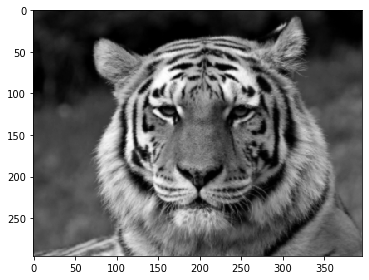

In [13]:
imshow(img_filtered);

In [14]:
img_gauss = imread('gaussian-tiger.png')

In [15]:
np.array_equal(img_filtered, img_gauss)

True

In [16]:
imsave('tiger-gauss-my.png', img_filtered)